IMPORTING LIBRARIES

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


LOADING THE DATASET

In [177]:
ds=pd.read_csv('titanic.csv')
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


top 5 heads of the dataset.

In [178]:
ds.shape

(891, 12)

we have 891 rows and 12 columns in the dataset

In [179]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Total number of columns is 12 in the dataset in which we have 5 columns is for integer datatype , 5 columns is for object data type and 2 columns is for float datatype

In [180]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have missing values in age , cabin and embarked column

EDA

CHECKING UNIQUE VALUES IN COLUMNS


<AxesSubplot:xlabel='Survived', ylabel='count'>

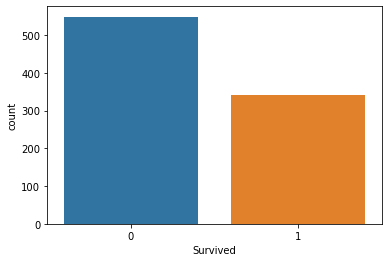

In [181]:
#survived column
sns.countplot(ds['Survived'])

In [182]:
ds['Survived'].unique()

array([0, 1], dtype=int64)

In [183]:
ds['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In survived column we have two unique values 0 and 1,
0 is indiacting not survived and 1 is indicating who survived.

549 persons who not survived and 342 persons who survived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

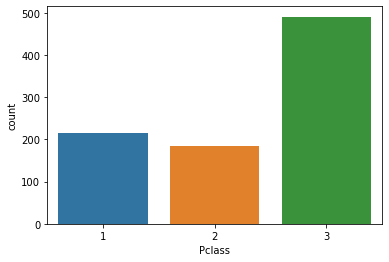

In [184]:
# pclass column

sns.countplot(ds['Pclass'])

In [185]:
ds['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [186]:
ds['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In Pclass column we have we have three unique values 1 ,2 and 3.
1 is indiacting 1st class in which 216 person were there, 2 is indicating 2nd class in which 184 persons were there and 3 is indiacting 3rd class in which 491 persons were there.

<AxesSubplot:xlabel='Sex', ylabel='count'>

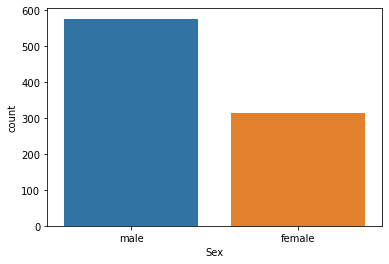

In [187]:
# sex column
sns.countplot(ds['Sex'])

In [188]:
ds['Sex'].unique()

array(['male', 'female'], dtype=object)

In [189]:
ds['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In Sex column we have two unique values male and female, in the plot blue color is indicating male and yellow color is indicating female.
total number of male is 577 and total number of female is 314

<AxesSubplot:xlabel='SibSp', ylabel='count'>

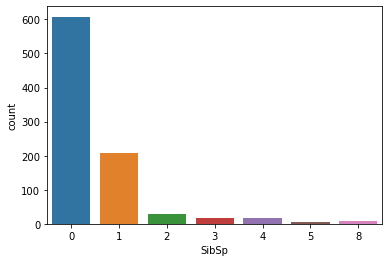

In [190]:
# sex column
sns.countplot(ds['SibSp'])

In [191]:
ds['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [192]:
ds['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

showing the value count 

<AxesSubplot:xlabel='Age', ylabel='Density'>

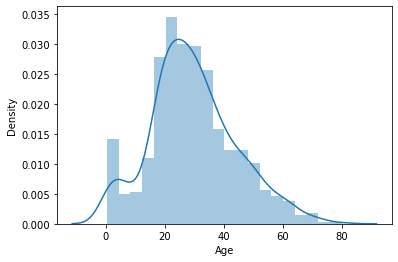

In [193]:
# distribution plot for Fare
sns.distplot(ds['Age'])

Showing the distribution of Age group, we can see age group of 25 persons is more on the dataset, and data is normally distributed

<AxesSubplot:xlabel='Fare', ylabel='Density'>

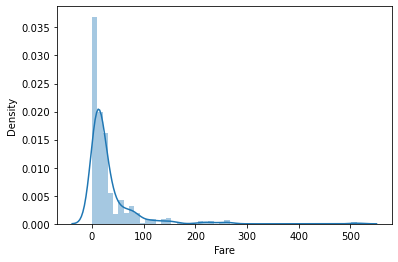

In [194]:
# distribution plot for Age
sns.distplot(ds['Fare'])

showing distribution of fare, data is normally distributed

CHECKING OUTLIERS

<AxesSubplot:xlabel='Pclass'>

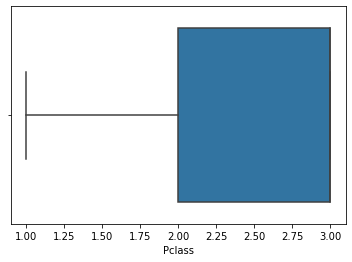

In [195]:
sns.boxplot(ds['Pclass'])

outliers are not present in this column

<AxesSubplot:xlabel='Age'>

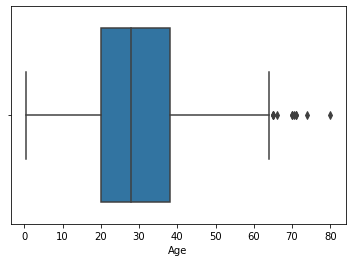

In [196]:
sns.boxplot(ds['Age'])

some outliers are present in the age column

<AxesSubplot:xlabel='Fare'>

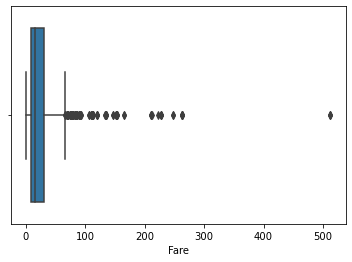

In [197]:
sns.boxplot(ds['Fare'])

outliers are present in the Fare cloumn

BI VARIATE ANALYSIS

<AxesSubplot:title={'center':' comparison between Age and Fare'}, xlabel='Age', ylabel='Fare'>

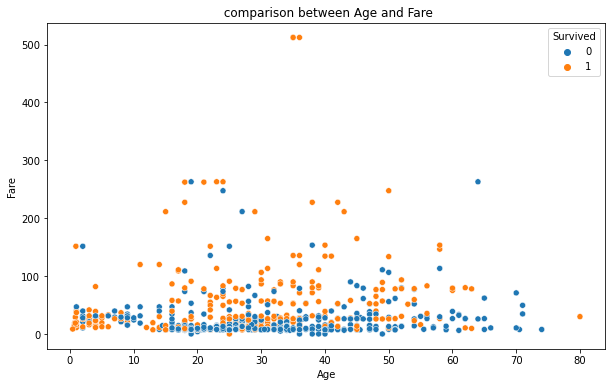

In [198]:


plt.figure(figsize=[10,6])
plt.title(' comparison between Age and Fare')
sns.scatterplot(ds['Age'], ds['Fare'],hue=ds['Survived'])

In this scatter plot Blue color is indicating who not survived and yellow color is indicating who survived.

<AxesSubplot:title={'center':' comparison between Age width and Pclass'}, xlabel='Age', ylabel='Pclass'>

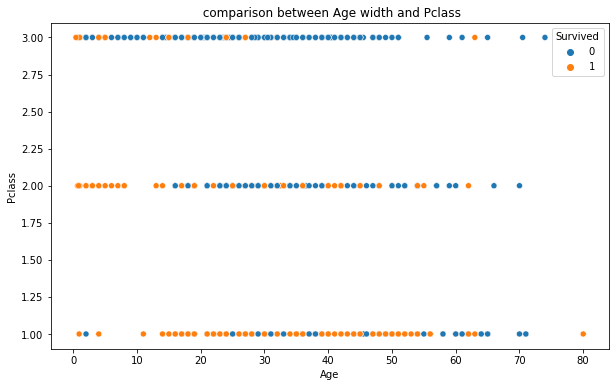

In [199]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age width and Pclass')
sns.scatterplot(ds['Age'], ds['Pclass'],hue=ds['Survived'])

We can see 3 groups of data spred in the plot.

CHECKING CORRELATION

In [200]:
cor=ds.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

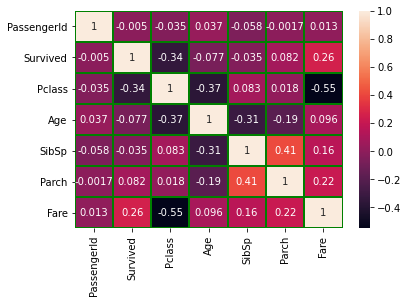

In [201]:
sns.heatmap(cor, annot=True, linewidths=1, linecolor='green')

Passengerld, Pclass ,Age, SibSp is negatively correlated with survived column.

Fare and Pclass is showing very little positive correlation with survived column.

CONVERTING OBJECT DATATYPE INTO NUMERIC DATATYPE

In [202]:
from sklearn.preprocessing import LabelEncoder

In [203]:
LE=LabelEncoder()
ds['Sex']=LE.fit_transform(ds['Sex'])

In [204]:
ds['Ticket']=LE.fit_transform(ds['Ticket'])

In [205]:
ds['Cabin']=LE.fit_transform(ds['Cabin'])

In [206]:
ds['Embarked']=LE.fit_transform(ds['Embarked'])

In [207]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2


Now we can see object columns is converted into numeric columns.
Name column is not necessary to chnage.

TREATING NULL VALUES

In [208]:
ds.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

in age column we have null values.

In [209]:
ds['Age']=ds['Age'].fillna(ds['Age'].mean())

In [210]:
ds.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

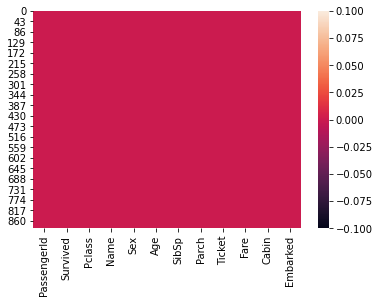

In [211]:
sns.heatmap(ds.isnull())

Now we can see ,no missing values is present in any of the column.

SPPLITTING THE DATASET

In [217]:
x=ds.drop(columns=['Name','Cabin','Embarked','Ticket','Survived'])
y=ds['Survived']

we have dropped Name and cabin column because Name column is not necessary for the dataset and cabin cloumn had 687 null values out of 891 rows, 
other columns is for object data type so we cannot pass it in model building.

MODEL BUILDING

In [227]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [220]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.30, random_state=i)
    model=DecisionTreeClassifier()
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('best accuracy is ',maxAccu,'on random_state', maxRS)        
        
    


best accuracy is  0.7985074626865671 on random_state 4


we can get best accuracy score on random_state 4

TRAIN TEST SPLIT

In [222]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=4)

In [228]:
#DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7723880597014925
[[150  28]
 [ 33  57]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       178
           1       0.67      0.63      0.65        90

    accuracy                           0.77       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.77      0.77      0.77       268



decision tree classifier is giving 77% accuracy score.

In [229]:
# For Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.8171641791044776
[[157  21]
 [ 28  62]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       178
           1       0.75      0.69      0.72        90

    accuracy                           0.82       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.82      0.82       268



Logistic regression is giving 81% accuracy score.

In [230]:
# For AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()

ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))



0.8097014925373134
[[152  26]
 [ 25  65]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       178
           1       0.71      0.72      0.72        90

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



adaboost classifier is giving 80% accuracy score.

In [231]:
# for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.8582089552238806
[[163  15]
 [ 23  67]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       178
           1       0.82      0.74      0.78        90

    accuracy                           0.86       268
   macro avg       0.85      0.83      0.84       268
weighted avg       0.86      0.86      0.86       268



random forest classifier is giving 85% accuracy score.

In [232]:
# for Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8097014925373134
[[155  23]
 [ 28  62]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       178
           1       0.73      0.69      0.71        90

    accuracy                           0.81       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.81      0.81      0.81       268



Gaussian NB is giving 80% accuracy score.

we are getting highest accuracy with RandomForestClassifier that is 85%, but it can be due to overfitting also, so we will have to cross validate it.

CROSS VALIDATION

In [234]:
from sklearn.model_selection import cross_val_score

In [235]:
# For DecisionTreeClassifier
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7599648484087628


cross validation score of decision tree classifier is 75%.

In [236]:
# For Logistc regression
scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7677358609001319


cross validation score of logistic regression is 76%.

In [240]:
#For AdaBoostClassifier
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7251522189441968


cross validation score of adaboost classifier is 72%.

In [238]:
# For randomforest Classifier
scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.8093088946079969


cross validation score of random forest classifier is 80%.

In [239]:
# For GaussianNB
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7890151277383718


cross validation score of GaussianNB is 78%. 

minimum difference in accuracy and cross validation is for GaussianNB, so GaussianNB is best model.



HYPER PARAMETER TUNING

In [244]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

gnb=GaussianNB()

grid_param={'var_smoothing': np.logspace(0,-9, num=100)}

gd_sr=GridSearchCV(estimator=gnb,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'var_smoothing': 1e-07}
0.790132446174126


so on the basis of above calculations GaussianNB is the best model after checking accuracy ,cross validation and hyper parameter tuning with the percentage of 79%.

I tried removing outliers from age anf fare columns but loosing the data.

SAVING THE MODEL

In [246]:
import joblib
joblib.dump(gnb,'TITANIC.PKL')

['TITANIC.PKL']